In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import wasserstein_distance

%matplotlib widget

In [2]:
rawData = loadmat('/gpfs/bbp.cscs.ch/project/proj85/vagusNerve/vagusNerveCode/eCAPSdata_220303.mat')
a500 = list(rawData['eCAPSdata_220328'][0][-5])

rawSignal = a500[1][-1]-a500[1][0]
rawTime = a500[2][0]

timeLimits = np.intersect1d( np.where(rawTime < 9 )[0], np.where(rawTime>1)[0] )

rawTime = rawTime[timeLimits]
rawSignal = rawSignal[timeLimits]

scaledSignal = rawSignal / np.max(np.abs(rawSignal))

    
tmin=-3 # In s
tmax=3 # In s
nx=500000
tphi=np.arange(tmin,tmax,(tmax-tmin)/(nx-1))

time = tphi[1:-1]*1e3

indices = []
for t in rawTime:
    indices.append(np.argmin(np.abs(time-t)))

# time = time[indices]

In [3]:
def get_error_scaled(signal):

    
    rawData = loadmat('/gpfs/bbp.cscs.ch/project/proj85/vagusNerve/vagusNerveCode/eCAPSdata_220303.mat')
    a500 = list(rawData['eCAPSdata_220328'][0][-5])
    
    rawSignal = a500[1][-1]-a500[1][0]
    rawTime = a500[2][0]

    timeLimits = np.intersect1d( np.where(rawTime < 9 )[0], np.where(rawTime>1)[0] )

    rawTime = rawTime[timeLimits]
    rawSignal = rawSignal[timeLimits]

    rawSignal /= np.max(np.abs(rawSignal))
    
    tmin=-3 # In s
    tmax=3 # In s
    nx=500000
    tphi=np.arange(tmin,tmax,(tmax-tmin)/(nx-1))
    
    time = tphi[1:-1]*1e3
    
    indices = []
    for t in rawTime:
        indices.append(np.argmin(np.abs(time-t)))

    signal = signal[0,indices]

    signal /= np.max(np.abs(signal))

    return wasserstein_distance(rawSignal,signal) #np.min(np.sum(np.abs(rawSignal-signal)))

In [4]:
def get_error(signal):

    
    rawData = loadmat('/gpfs/bbp.cscs.ch/project/proj85/vagusNerve/vagusNerveCode/eCAPSdata_220303.mat')
    a500 = list(rawData['eCAPSdata_220328'][0][-5])
    
    rawSignal = a500[1][-1]-a500[1][0]
    rawTime = a500[2][0]

    timeLimits = np.intersect1d( np.where(rawTime < 9 )[0], np.where(rawTime>1)[0] )

    rawTime = rawTime[timeLimits]
    rawSignal = rawSignal[timeLimits]
    
    tmin=-3 # In s
    tmax=3 # In s
    nx=500000
    tphi=np.arange(tmin,tmax,(tmax-tmin)/(nx-1))
    
    time = tphi[1:-1]*1e3
    
    indices = []
    for t in rawTime:
        indices.append(np.argmin(np.abs(time-t)))

    signal = signal[0,indices]

    return wasserstein_distance(rawSignal,signal) #np.min(np.sum(np.abs(rawSignal-signal)))

In [5]:
x0s = np.linspace(5,7,num=6)
y0s = np.linspace(0.5,0.7,num=6)

x1s = np.linspace(7.5,9.5,num=6) 
y1s = np.linspace(0.4,0.6,num=6)

allSignals = []
allErrors = []
allErrors_Unscaled = []

valsY0s = []
valsX0s = []

valsY1s = []
valsX1s = []

for j, x0 in enumerate(x0s):

    index = 0
    
    for y0 in y0s:
        for x1 in x1s:
            for y1 in y1s:

                # signal = 0

                # try:

                #     for i in range(39):
                #         signal += np.load('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/optimization/signals/maff/'+str(j)+'/'+str(index)+'/signals_'+str(i)+'.npy')
                #         signal += np.load('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/optimization/signals/meff/'+str(j)+'/'+str(index)+'/signals_'+str(i)+'.npy')
    
                
                #     error = get_error(signal)
                #     error_scaled = get_error_scaled(signal)
    
                #     allErrors.append(error_scaled)
                #     allErrors_Unscaled.append(error)
    
                #     allSignals.append(signal)

                # except:

                #     allErrors.append(100)
                #     allErrors_Unscaled.append(100)
                #     allSignals.append([])

                valsY1s.append(y1)
                valsX1s.append(x1)

                valsY0s.append(y0)
                valsX0s.append(x0)

                index += 1


In [8]:
valsX0s = np.array(valsX0s)
valsX1s = np.array(valsX1s)
valsY0s = np.array(valsY0s)
valsY1s = np.array(valsY1s)


In [6]:
allErrors_Unscaled = np.load('allErrors_Unscaled.npy')
allErrors = np.load('allErrors.npy')
allSignals = np.load('allSignals.npy')

In [21]:
err = allErrors_Unscaled.reshape((len(x0s),len(y0s),len(x1s),len(y1s)))

In [9]:
x0 = valsX0s.reshape((len(x0s),len(y0s),len(x1s),len(y1s)))
x1 = valsX1s.reshape((len(x0s),len(y0s),len(x1s),len(y1s)))
y0 = valsY0s.reshape((len(x0s),len(y0s),len(x1s),len(y1s)))
y1 = valsY1s.reshape((len(x0s),len(y0s),len(x1s),len(y1s)))

In [18]:
x0[:,0,0,0]

array([5. , 5.4, 5.8, 6.2, 6.6, 7. ])

In [19]:
y0[0,:,0,0]

array([0.5 , 0.54, 0.58, 0.62, 0.66, 0.7 ])

In [25]:
np.argmin(err)

np.int64(1104)

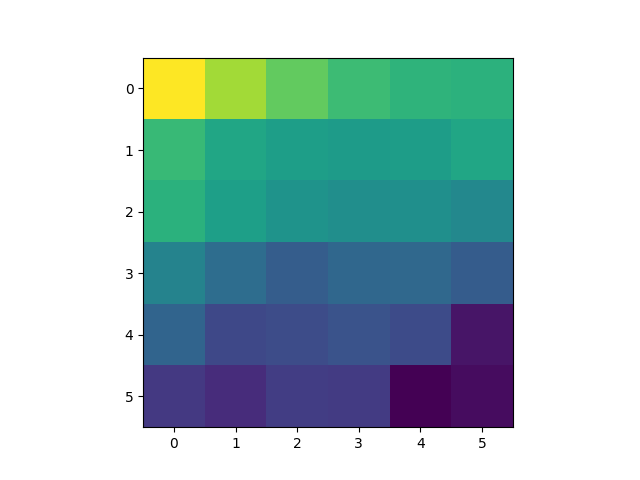

In [22]:
plt.figure()
plt.imshow(err[:,:,0,0])

In [12]:
print(valsX0s[250])
print(valsY0s[250])
print(valsX1s[250])
print(valsY1s[250])

5.4
0.5
9.5
0.56


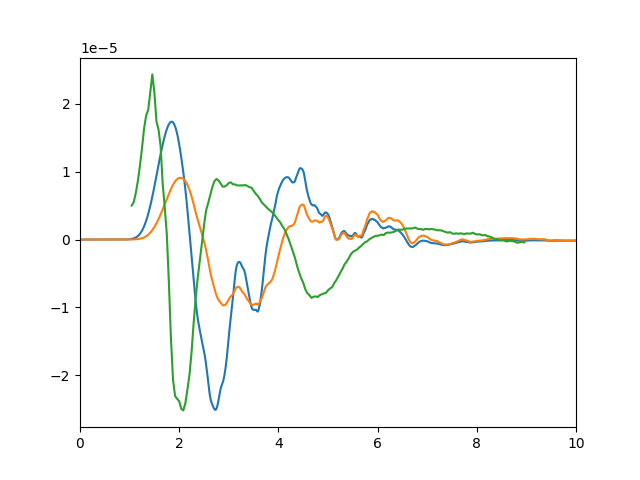

In [15]:
plt.figure()
plt.plot(time,allSignals[1104][0])
plt.plot(time,allSignals[222][0])
plt.plot(rawTime,rawSignal)

plt.xlim([0,10])
plt.show()

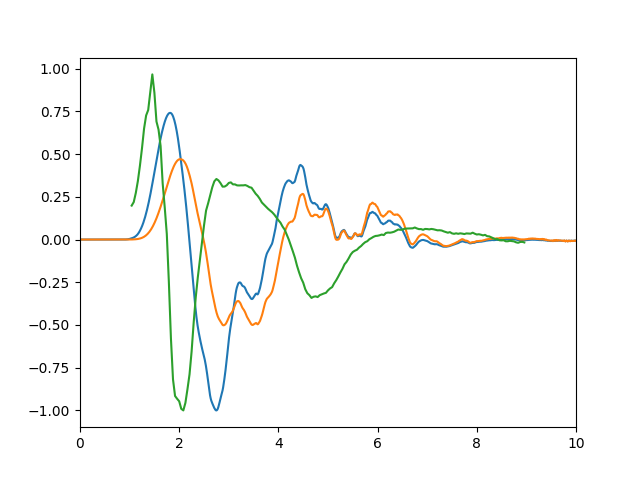

In [48]:
plt.figure()
plt.plot(time,allSignals[301][0]/np.max(np.abs(allSignals[301][0])))
plt.plot(time,allSignals[222][0]/np.max(np.abs(allSignals[301][0])))
plt.plot(rawTime,scaledSignal)

plt.xlim([0,10])
plt.show()

In [50]:
np.argsort(allErrors_Unscaled)

array([ 250,  245,  251, ...,  596,  598, 1295])

In [47]:
list(np.argsort(allErrors))[572]

222

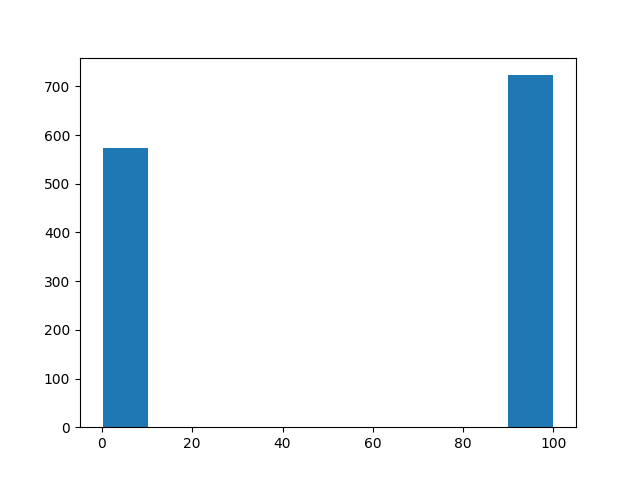

In [17]:
plt.figure()
plt.hist(allErrors)
plt.show()

In [18]:
x.shape

(1296, 1296)

In [19]:
allErrors_Unscaled.shape

(1296,)

In [ ]:
a

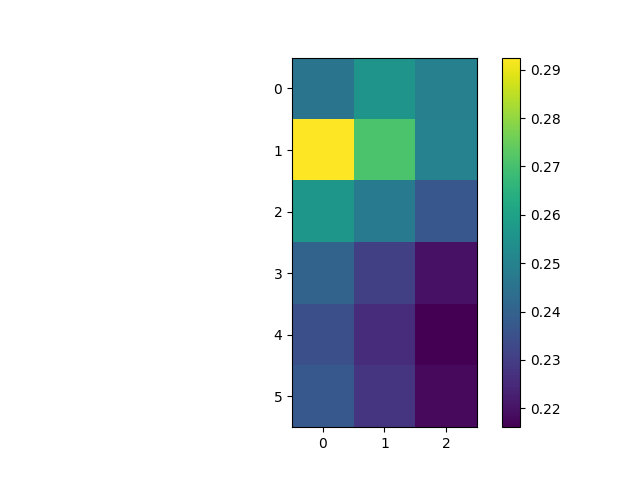

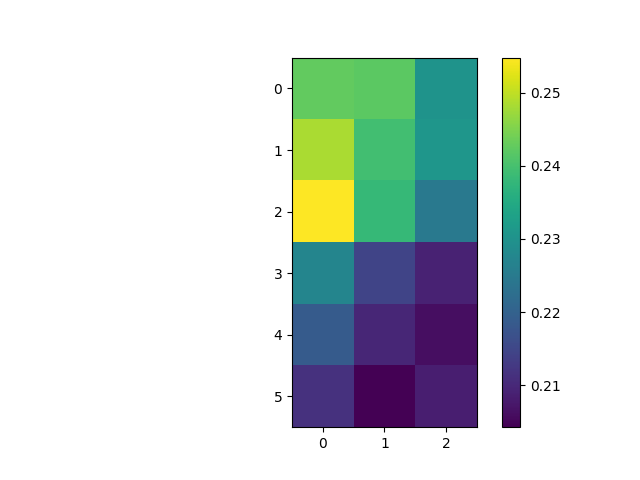

In [33]:
plt.figure()
plt.imshow(np.array(allErrors_Unscaled).reshape(6,6,6,6)[:,2,:3,0])
plt.colorbar()

plt.figure()
plt.imshow(np.array(allErrors_Unscaled).reshape(6,6,6,6)[:,:3,3,0])
plt.colorbar()

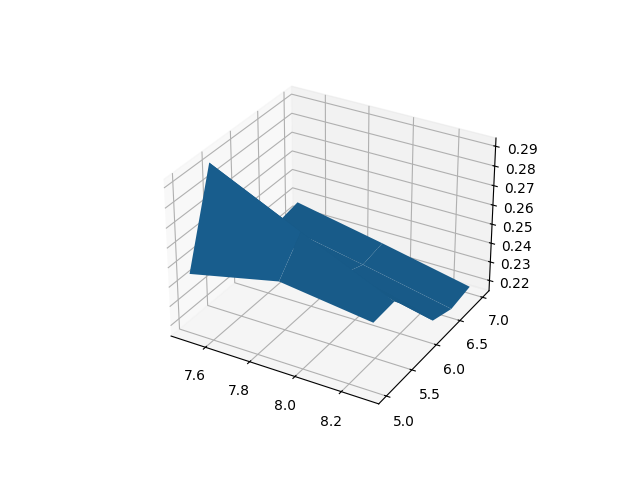

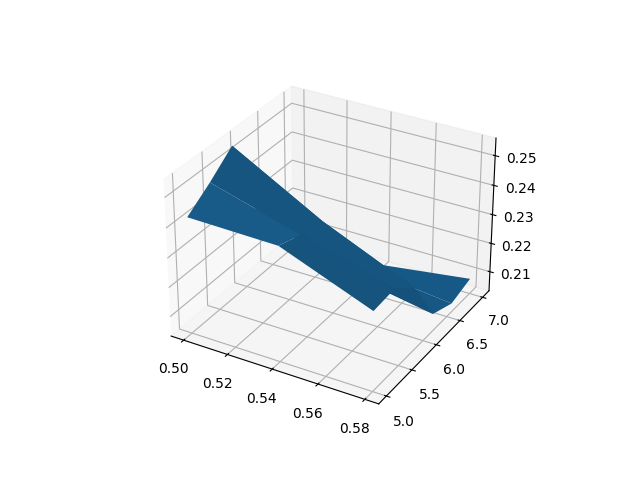

In [44]:
fig = plt.figure()

x, y = np.meshgrid(x1s[:3],x0s)
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(x,y,allErrors_Unscaled.reshape(6,6,6,6)[:,2,:3,0])
plt.show()

fig = plt.figure()

x, y = np.meshgrid(y0s[:3],x0s)
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(x,y,allErrors_Unscaled.reshape(6,6,6,6)[:,:3,3,0])
plt.show()

In [10]:
from math import gamma
def gammaDist(x,k,theta):
    
    return 1 / (gamma(k)*theta**k) * x**(k-1)*np.exp(-x/theta)

In [11]:
def getDiameters(iteration):
    
   
    minDiam = .1
    
    
    maxDiam = 10 #7 + 5*iteration/30 
    
    d = np.linspace(minDiam,maxDiam,1000)*1e-6

    return d

In [12]:
d = getDiameters(0)

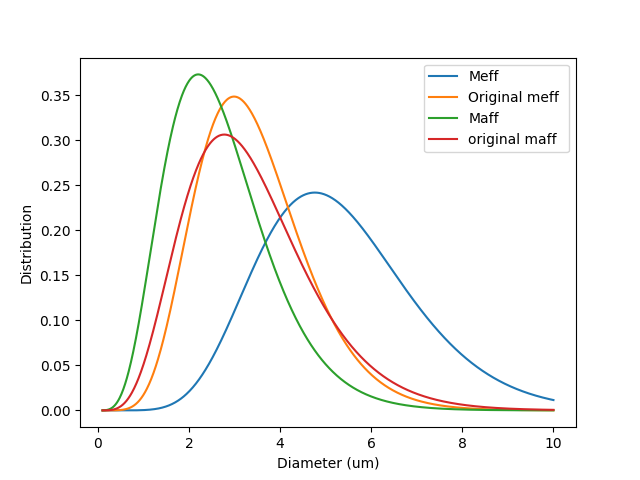

In [13]:
plt.figure()

startParams = [7.98,0.428]
meffParams = [9.5,.56]
maffParams = [5.4,.5]
maffStart = [5.7,0.59]

plt.plot(d*1e6,gammaDist(d*1e6,meffParams[0],meffParams[1]))
plt.plot(d*1e6,gammaDist(d*1e6,startParams[0],startParams[1]))

plt.plot(d*1e6,gammaDist(d*1e6,maffParams[0],maffParams[1]))

plt.plot(d*1e6,gammaDist(d*1e6,maffStart[0],maffStart[1]))

plt.legend(['Meff','Original meff ', 'Maff','original maff'])
plt.xlabel('Diameter (um)')
plt.ylabel('Distribution')
plt.show()